<a href="https://colab.research.google.com/github/srt3000/CE888/blob/main/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, KFold
from sklearn import model_selection
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.feature_selection import RFECV

In [2]:
d = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df = d.copy()
print(df)
print('rows with null values: ' ,df.isnull().sum().sum())


       age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]
rows with null values:  0


In [16]:
#using label encoder to convert label into number
#Y is converted to numbers using label encoder
df[["y"]]= df[["y"]].apply(LabelEncoder().fit_transform)
print(Y)



       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]


In [17]:
#perform one hot encoding to categorical attributes
df_dummies = pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"])
df_dummies





,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


(41188, 1)


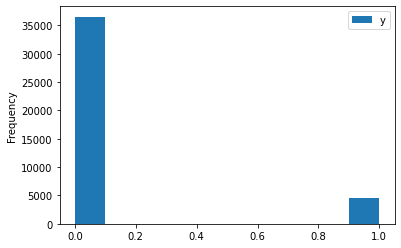

In [18]:
#Plot histogram of the label and calculate the imbalance in the dataset.
Y.plot.hist()
print(Y.shape)

#so we can see the imbalance in the dataset, 0 has 350000 values while 1 has 5000 values

In [19]:
#Column "duration" must be deleted, drop the categorical values in df andCombine the dummies
# combine all the x values to x
#drop the duration 
#Check if there are any missing values in the dataset. If there are, drop the rows.
df_dummies.dropna(axis=0, how='any', inplace=True)

df_dummies.drop('duration',axis=1, inplace=True)
Y= df_dummies.y
x= df_dummies.drop('y',axis=1)


print(df_dummies)
print(x)
print(Y)





       age  campaign  ...  poutcome_nonexistent  poutcome_success
0       56         1  ...                     1                 0
1       57         1  ...                     1                 0
2       37         1  ...                     1                 0
3       40         1  ...                     1                 0
4       56         1  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73         1  ...                     1                 0
41184   46         1  ...                     1                 0
41185   56         2  ...                     1                 0
41186   44         1  ...                     1                 0
41187   74         3  ...                     0                 0

[41188 rows x 63 columns]
       age  campaign  ...  poutcome_nonexistent  poutcome_success
0       56         1  ...                     1                 0
1       57         1  ...                     1  

In [20]:
#Use test train split to split the data for train and test
#stratify =y  to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

x_train, x_test, y_train, y_test = train_test_split(x, Y,  test_size=0.20, random_state=50,stratify=Y)




In [21]:
# Fitting Random Forest Classification to the Training set,  10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

kfold = StratifiedKFold(n_splits=10,shuffle= True, random_state=50)
model_kfold = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state =50)
model_kfold.fit(x_train,y_train)
scores = cross_val_score(model_kfold, x_train, y_train, cv=kfold, n_jobs=-1, scoring='accuracy', verbose=10)
print(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s


[0.89590288 0.90257967 0.89984825 0.892261   0.89893778 0.90288316
 0.89620637 0.89893778 0.89742033 0.89863429]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished


In [22]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [23]:
#Compare the results of your classifier with that of a dummy classifier.
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train,y_train)
f1_score = cross_val_score(dummy_clf, x_train, y_train, scoring="f1",cv=10)
print('F1 score mean of the results is : ',f1_score.mean())
print("Dummy ACC: %.2f" % precision_score(y_test, dummy_clf.predict(x_test)))



F1 score mean of the results is :  0.11837019417977226
Dummy ACC: 0.11


In [33]:
from sklearn.model_selection import GridSearchCV
# Using the GridSearchCV, hyperparameters are tuned
# Arranging Parameter Range 
'''param_grid = { 
    'n_estimators': [50,100,200,300,400], 
    'max_features': ['auto'],
    'max_depth' : [3,5,10,15,20],
    'criterion' :['gini', 'entropy']
}'''
param_grid = { 
    'n_estimators': [50,100], 
    'max_features': ['auto'],
    'max_depth' : [3,5,10],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=model_kfold, param_grid=param_grid, cv = 10)

grid.fit(x_train, y_train)

# Best parameter after tuning 
print(grid.best_params_)
grid.best_score_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


0.9007283763277693

In [26]:
from sklearn.model_selection import GridSearchCV
# Using the GridSearchCV, hyperparameters are tuned
# Arranging Parameter Range 

param_grid = { 
    'n_estimators': [50,100], 
    'max_features': ['auto'],
    'max_depth' : [3,5,10],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=model_kfold, param_grid=param_grid, cv = 10)

grid.fit(x_train, y_train)
print("Best parameter after tuning",grid.best_score_)

Best parameter after tuning 0.9007283763277693


In [27]:
kfoldscore = cross_val_score(estimator=grid.best_estimator_, X=x_train, 
                            y=y_train, cv=kfold, n_jobs=-1, scoring='accuracy', verbose=10)
print("scores of kfold using best estimator ",kfoldscore)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.2s


scores of kfold using best estimator  [0.89438543 0.90925645 0.90227618 0.89317147 0.89863429 0.90318665
 0.89954476 0.89924127 0.89924127 0.89893778]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished


In [28]:

print('Train Accuracy:', grid.score(x_train,y_train))
print('Test Accuracy :', grid.score(x_test,y_test))


Train Accuracy: 0.9142336874051593
Test Accuracy : 0.9010682204418549


In [44]:
features = sorted(df_dummies)
print(features)



['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_cellular', 'contact_telephone', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'emp.var.rate', 'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'loan_no', 'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'nr.employed', 'pdays', 'poutcome

In [45]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10,max_features='auto',criterion='entropy')
score = cross_val_score(clf, x_train, y_train, scoring="f1",cv=10)  # cross-validation
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)



In [46]:
print("cross validation f1 score: ", score)
#clf.f1_score(y_test,y_predict)
#print("ACC: %.2f +/- %.2f" % (score.mean(), score.std()))

cross validation f1 score:  [0.33333333 0.364      0.28274428 0.32780083 0.27216495 0.33679834
 0.43243243 0.32032854 0.32916667 0.31578947]


In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10,max_features='auto',criterion='entropy')
score = cross_val_score(clf, x_train, y_train, scoring="f1",cv=10)  # cross-validation
clf.fit(x_train,y_train.values.ravel())
y_predict = clf.predict(x_test)
print("cross validation score: ", score)
print("f1 score of new classifier: ", f1_score.mean(y_test,y_predict.values.ravel()))
#print("ACC: %.2f +/- %.2f" % (score.mean(), score.std()))


[ 8  7  4  2  6 61  5  0  3 50 43  1 42 52 49 59 60 33 44 34 55 10 31 54
 56 22 58 57 23 36 38 48 39 28 14 27  9 41 30 17 25 18 21 53 16 47 32 13
 45 26 15 51 12 19 11 37 40 20 46 24 29 35]
Feature ranking:
1. day_of_week_thu (0.156612)
2. day_of_week_mon (0.137247)
3. contact_cellular (0.098312)
4. cons.conf.idx (0.076985)
5. day_of_week_fri (0.072649)
6. previous (0.055911)
7. contact_telephone (0.053901)
8. age (0.039540)
9. cons.price.idx (0.021175)
10. month_jun (0.020035)
11. marital_married (0.019991)
12. campaign (0.019047)
13. marital_divorced (0.015781)
14. month_may (0.013921)
15. month_jul (0.012232)
16. poutcome_nonexistent (0.010202)
17. poutcome_success (0.009157)
18. job_self-employed (0.008295)
19. marital_single (0.008081)
20. job_services (0.008057)
21. month_sep (0.007084)
22. day_of_week_wed (0.006121)
23. job_management (0.005956)
24. month_oct (0.005350)
25. nr.employed (0.005063)
26. emp.var.rate (0.004913)
27. poutcome_failure (0.004890)
28. pdays (0.004876)
29

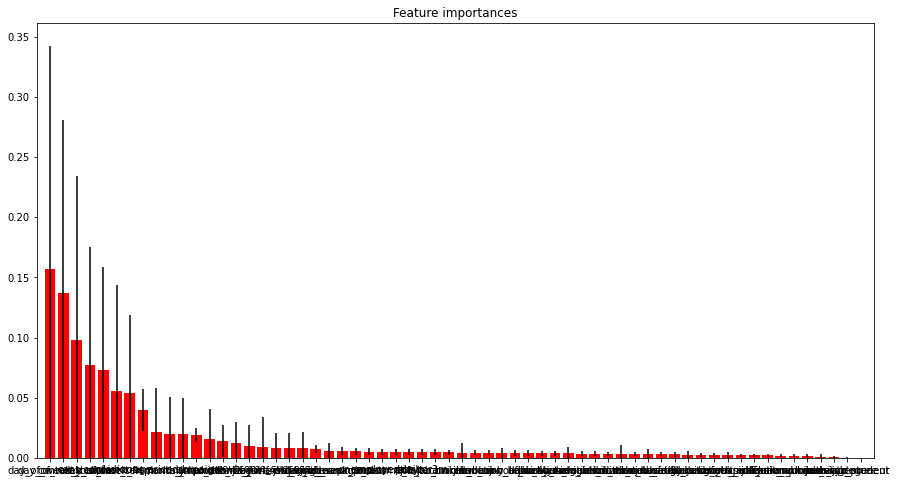

In [49]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

Normalized confusion matrix


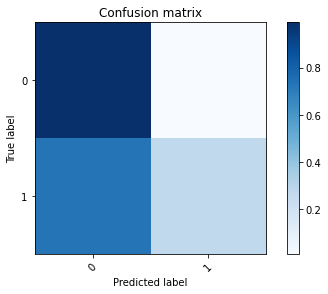

In [52]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


# Compute confusion matrix
y_predict = clf.predict(x)
cnf_matrix = confusion_matrix(Y, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(Y))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.pdf", bbox_inches='tight')